In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix, classification_report


In [3]:
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

y_train_one_hot = to_categorical(y_train, num_classes=3)
y_test_one_hot = to_categorical(y_test, num_classes=3)

print("--- Data Preprocessing ---")
print("Shape of scaled training features (X_train_scaled):", X_train_scaled.shape)
print("Shape of one-hot encoded training labels (y_train_one_hot):", y_train_one_hot.shape)
print("-" * 30, "\n")


--- Data Preprocessing ---
Shape of scaled training features (X_train_scaled): (120, 4)
Shape of one-hot encoded training labels (y_train_one_hot): (120, 3)
------------------------------ 



In [6]:

model = Sequential()


model.add(Dense(10, input_shape=(4,), activation='relu'))

model.add(Dense(3, activation='softmax'))


model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


print("--- Model Architecture ---")
model.summary()
print("-" * 30, "\n")


--- Model Architecture ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 83 (332.00 B)

 Trainable params: 83 (332.00 B)

 Non-trainable params: 0 (0.00 B)

------------------------------ 



--- Training the Model ---
✅ Model training complete!

Final Training Accuracy: 95.83%
Final Testing Accuracy: 93.33%
------------------------------ 

--- Model Evaluation ---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


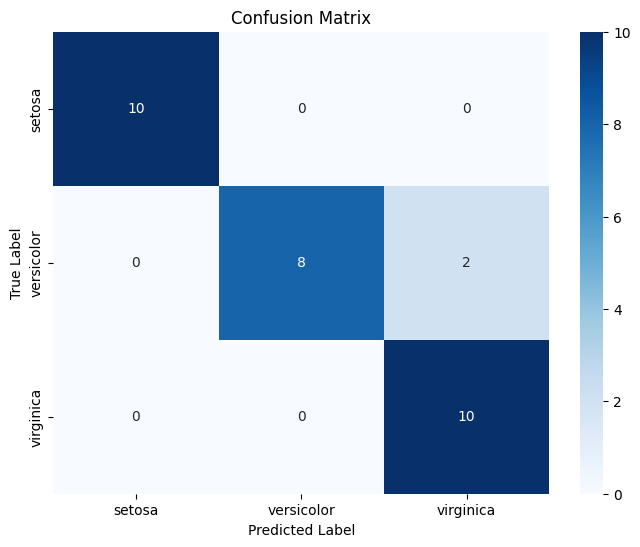


Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.80      0.89        10
   virginica       0.83      1.00      0.91        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



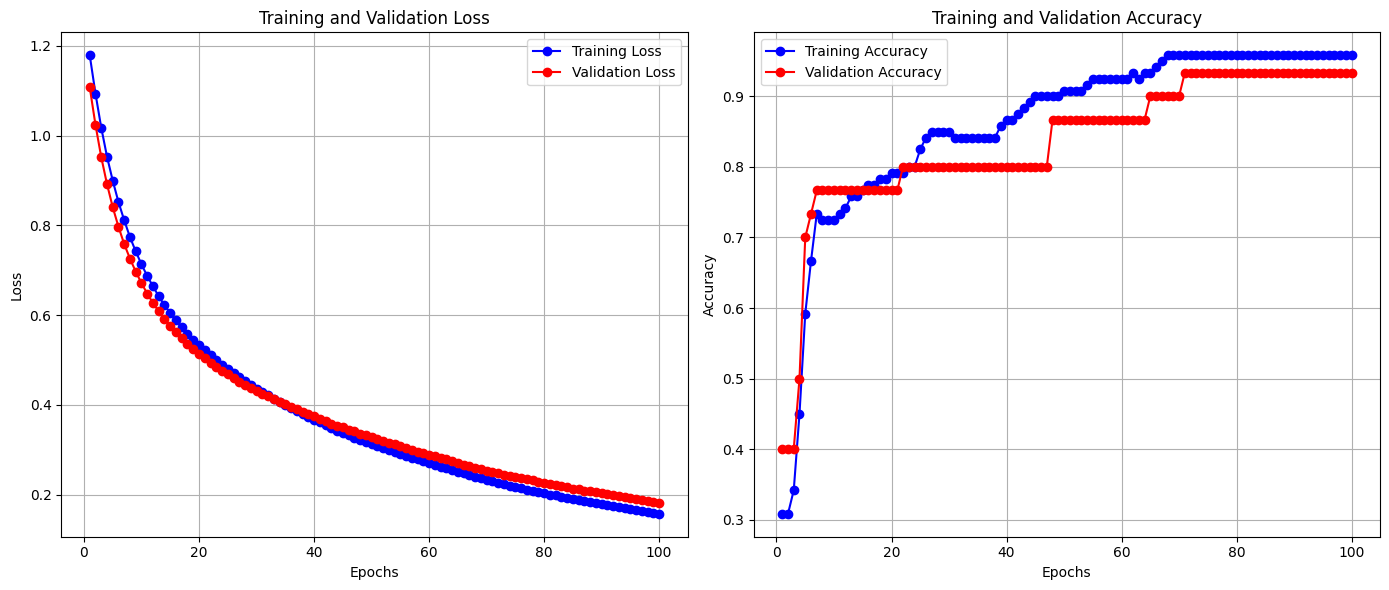

In [7]:
# 4. TRAINING THE MODEL
# -----------------------
print("--- Training the Model ---")

history = model.fit(X_train_scaled, y_train_one_hot,
                    epochs=100,
                    batch_size=10,
                    validation_data=(X_test_scaled, y_test_one_hot),
                    verbose=0)

print("✅ Model training complete!")

train_loss, train_acc = model.evaluate(X_train_scaled, y_train_one_hot, verbose=0)
test_loss, test_acc = model.evaluate(X_test_scaled, y_test_one_hot, verbose=0)

print(f"\nFinal Training Accuracy: {train_acc*100:.2f}%")
print(f"Final Testing Accuracy: {test_acc*100:.2f}%")
print("-" * 30, "\n")

y_pred_prob = model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test_one_hot, axis=1)


conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=target_names))


history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()